# **Kelompok 3 C2**
1. 2101310 AKMAL ZULKIFLI
2. 2205297 NABILLA ASSYFA RAMADHANI
3. 2205410 RADITYA ADHA RAHMAN
4. 2106330 WILDAN MAULI DAROJAT
5. 2201017 ILHAM AKBAR

Klasifikasi gambar berdasarkan jenis kelamin (perempuan atau laki-laki)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


# **Download dataset**


In [3]:
# download file dataset dari Repositories github ke file Dataset_Gambar.zip
!wget --no-check-certificate \
  https://github.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/raw/main/dataset_image_kelompok3.zip \
  -O /tmp/Dataset_Gambar.zip


--2023-11-28 16:53:53--  https://github.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/raw/main/dataset_image_kelompok3.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/main/dataset_image_kelompok3.zip [following]
--2023-11-28 16:53:53--  https://raw.githubusercontent.com/radityadhaaa/TUGAS-KLASIFIKASI-IMAGE-KELOMPOK-3/main/dataset_image_kelompok3.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61616911 (59M) [application/zip]
Saving to: ‘/tmp/Dataset_Gambar.zip’

/tmp/Dataset_Gambar 100%[===================>]  58.76M   122MB/s    i

# **Mengubah file zip ke folder**


In [4]:
# Impor pustaka-pustaka untuk manipulasi file dan gambar
import zipfile, os
import os
# Definisikan path lokal ke file zip yang akan diekstrak
local_zip = '/tmp/Dataset_Gambar.zip'

# Buka file zip dengan mode baca ('r')
zip_ref = zipfile.ZipFile(local_zip, 'r')

# Ekstrak seluruh isi file zip ke folder '/content'
zip_ref.extractall('/content')

# Tutup file zip setelah selesai diekstrak
zip_ref.close()

# **Menyimpan path dataset**

In [5]:
import pathlib
# menyimpanan parh datset gambar ke data_dir untuk memudahkan pencarian
data_dir = pathlib.Path("/content/dataset_image_kelompok3")

# **Melihat Jumlah file image yang ada di dataset**

In [6]:
# Melihat jumlah file dengan format jpeg di dataset
image_count = len(list(data_dir.glob('*/*.jpeg')))
# Menampilkan
print(image_count)


734


# **Melihat jumlah file dari tiap class yang ada di dataset**

In [7]:
# untuk mencari class apa saja yang ada di dataset dan di simpan di list_dir
list_dir = [os.path.basename(x) for x in data_dir.iterdir() if x.is_dir()]
# menampilkan data verapa jumlah class yang ada
print("Jumlah class: {} ".format(len(list_dir)))
print("Jumlah instance per class")
# untuk menampilkan jumlah file masing- masing kelas
for x in list_dir:
  # untuk menampilkan hasil dari jumlah file
  print("{} = {} ".format(x,len(list(data_dir.glob('{}/*.jpeg'.format(x))))))



Jumlah class: 2 
Jumlah instance per class
Laki - Laki = 415 
Perempuan = 319 


# **Menampilkan image dari class laki - laki**

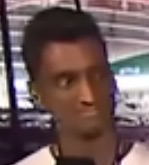

In [8]:
# mengambil data dari class laki - laki
laki_laki = list(data_dir.glob('Laki - Laki/*'))
# menampilkan data tersebut menjadi foto
PIL.Image.open(str(laki_laki[1]))

# **Menampilkan image dari class perempuan**

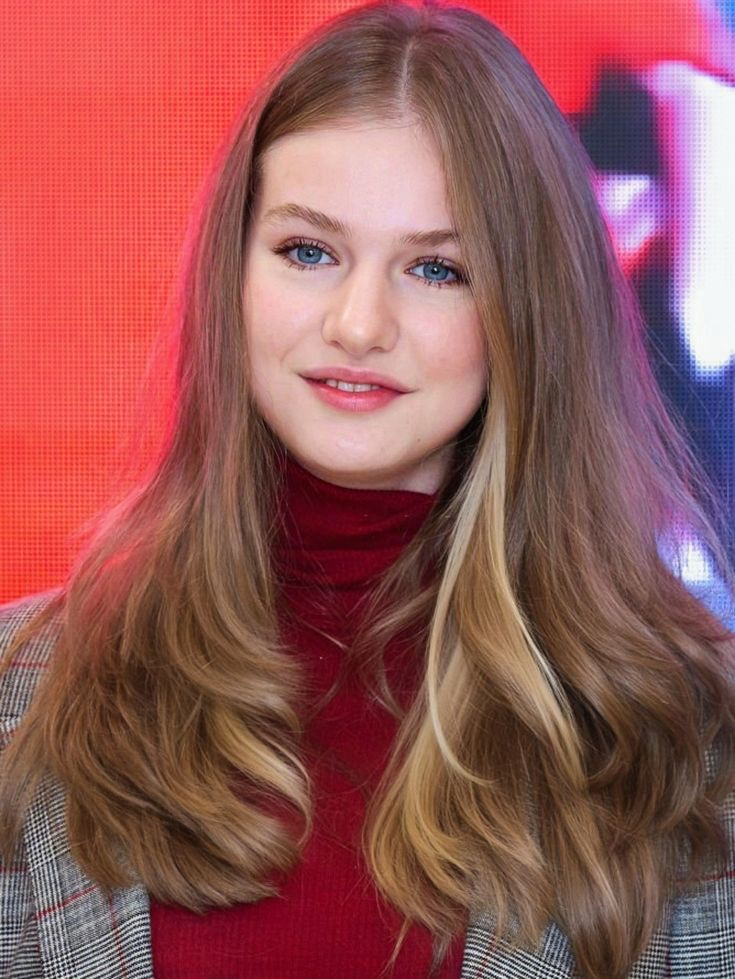

In [9]:
# mengambil data dari class perempuan
perempuan = list(data_dir.glob('Perempuan/*'))
# menampilkan data tersebut menjadi foto
PIL.Image.open(str(perempuan[1]))

# **Inisialisasi untuk panjang dan lebar image**

In [10]:
batch_size = 32
img_height = 180
img_width = 180

# **Pemisahan data Train dengan konfigurasi 80%**

In [11]:

train_ds = tf.keras.utils.image_dataset_from_directory(
  #Folder target untuk digenerasi
  data_dir,
  # jumlah data yang di split
  validation_split=0.4,
  #Untuk data training
  subset="training",
  seed=111,
  # ukuran file image
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 734 files belonging to 2 classes.
Using 441 files for training.


# **Pemisahan data Validasi dengan konfigurasi 20%**

In [12]:

val_ds = tf.keras.utils.image_dataset_from_directory(
  #Folder target untuk digenerasi
  data_dir,
  # jumlah data yang di split
  validation_split=0.4,
  # Untuk data validasi
  subset="validation",
  seed=111,
  # ukuran file image
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 734 files belonging to 2 classes.
Using 293 files for validation.


# **Penyimpan nama class di training**

In [13]:
class_names = train_ds.class_names
print(class_names)

['Laki - Laki', 'Perempuan']


# **Menampilkan image dari tiap class**

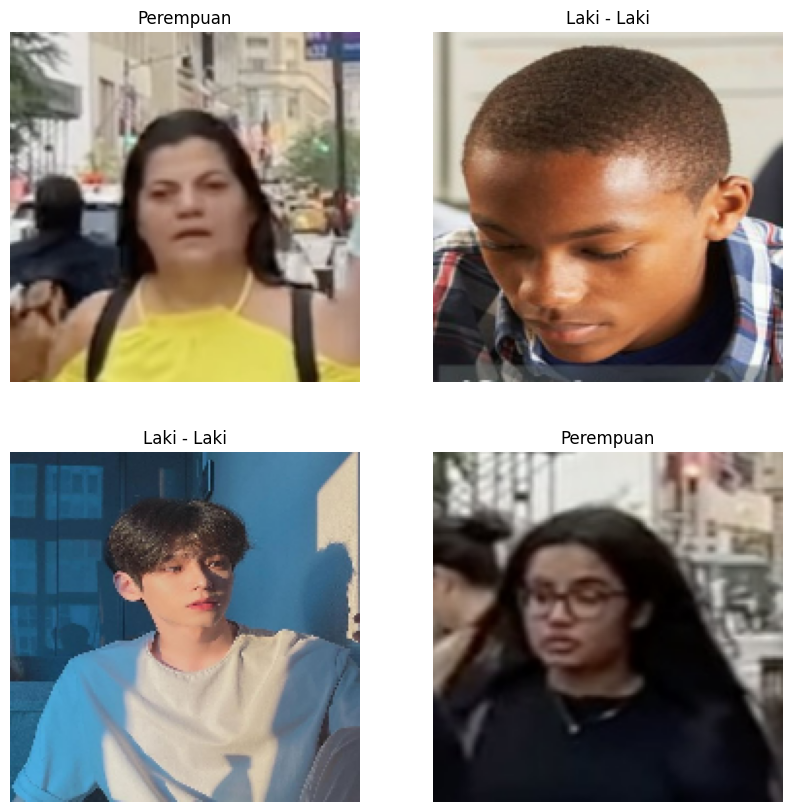

In [14]:
# lihat dataset training
import matplotlib.pyplot as plt
# ukuran gambar
plt.figure(figsize=(10, 10))
# penampilkan gambar berdasarkan class
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1) # 2 baris, 2 kolom
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


# **Menampikan batct dari data train**

In [15]:
# 32 per batch, 180x180 pixel, warna 3 (RGB)
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# **Meningkatkan efisiensi train**

In [16]:
# Konstanta untuk mengoptimalkan kinerja dataset (autotune)
AUTOTUNE = tf.data.AUTOTUNE

# Mengoptimalkan dataset pelatihan dengan caching, pengacakan, dan prefetching
train_ds = train_ds.cache()                 # Menyimpan dataset ke dalam cache untuk mempercepat akses
train_ds = train_ds.shuffle(1000)            # Mengacak dataset dengan buffer ukuran 1000
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)  # Memproses data secara asinkron untuk mengoptimalkan waktu pelatihan

# Mengoptimalkan dataset validasi dengan caching dan prefetching
val_ds = val_ds.cache()                     # Menyimpan dataset ke dalam cache
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)      # Memproses data secara asinkron untuk mengoptimalkan waktu validasi


# **Melakukan normalisasi dengan layer rescaling**

In [17]:
# normalisasi nilai RGB
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# nilai dari [0 sd 255] menjadi [0 sd 1]
print(np.min(first_image), np.max(first_image))


0.0 1.0


# **Membangun model**

In [18]:
# definisikan model
# Mendapatkan jumlah kelas dari panjang daftar kelas
num_classes = len(class_names)

# Membuat model Sequential
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalisasi nilai piksel ke dalam rentang 0-1
    layers.Conv2D(32, 3, padding='same', activation='relu'),           # Layer konvolusi dengan 32 filter
    layers.MaxPooling2D(),                                            # Layer max pooling untuk mengurangi resolusi spasial
    layers.Conv2D(64, 3, padding='same', activation='relu'),           # Layer konvolusi dengan 64 filter
    layers.MaxPooling2D(),                                            # Layer max pooling
    layers.Conv2D(128, 3, padding='same', activation='relu'),          # Layer konvolusi dengan 128 filter
    layers.MaxPooling2D(),                                            # Layer max pooling
    layers.Flatten(),                                                 # Mengubah matriks data menjadi vektor
    layers.Dense(256, activation='relu'),                             # Layer dense (fully connected) dengan 256 unit
    layers.Dense(1, activation='sigmoid')                             # Output layer dengan 1 unit dan fungsi aktivasi sigmoid untuk klasifikasi biner
])



# **Menampilkan model**

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 128)       7

# **Melakukan Kompilasi Model dengan optimasi adam**

In [20]:
# Mengompilasi model dengan pengoptimal RMSprop, fungsi loss Binary Crossentropy, dan metrik akurasi
model.compile(
    optimizer='RMSprop',                                           # Pengoptimal yang digunakan (RMSprop)
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),    # Fungsi loss yang digunakan (Binary Crossentropy)
    metrics=['accuracy']                                           # Metrik untuk evaluasi kinerja model (akurasi)
)



# **Melatih Model**

In [21]:

# Jumlah epochs yang ditentukan untuk pelatihan
epochs = 15

# Melakukan pelatihan model menggunakan metode fit
history = model.fit(
    train_ds,                    # Data pelatihan
    validation_data=val_ds,      # Data validasi
    epochs=epochs                # Jumlah epochs
)

Epoch 1/15
14/14 [==============================] - 13s 167ms/step - loss: 1.1401 - accuracy: 0.4898 - val_loss: 0.6900 - val_accuracy: 0.5939
Epoch 2/15
14/14 [==============================] - 1s 48ms/step - loss: 0.6916 - accuracy: 0.5397 - val_loss: 0.6839 - val_accuracy: 0.5939
Epoch 3/15
14/14 [==============================] - 1s 45ms/step - loss: 0.6929 - accuracy: 0.5238 - val_loss: 0.6807 - val_accuracy: 0.6041
Epoch 4/15
14/14 [==============================] - 1s 45ms/step - loss: 0.6904 - accuracy: 0.5510 - val_loss: 0.6690 - val_accuracy: 0.5939
Epoch 5/15
14/14 [==============================] - 1s 45ms/step - loss: 0.6609 - accuracy: 0.5941 - val_loss: 0.6565 - val_accuracy: 0.6246
Epoch 6/15
14/14 [==============================] - 1s 43ms/step - loss: 0.6374 - accuracy: 0.6304 - val_loss: 0.6187 - val_accuracy: 0.6587
Epoch 7/15
14/14 [==============================] - 1s 43ms/step - loss: 0.6943 - accuracy: 0.6735 - val_loss: 0.6069 - val_accuracy: 0.7065
Epoch 8/15


# **Menampilkan data accuracy dan loss**

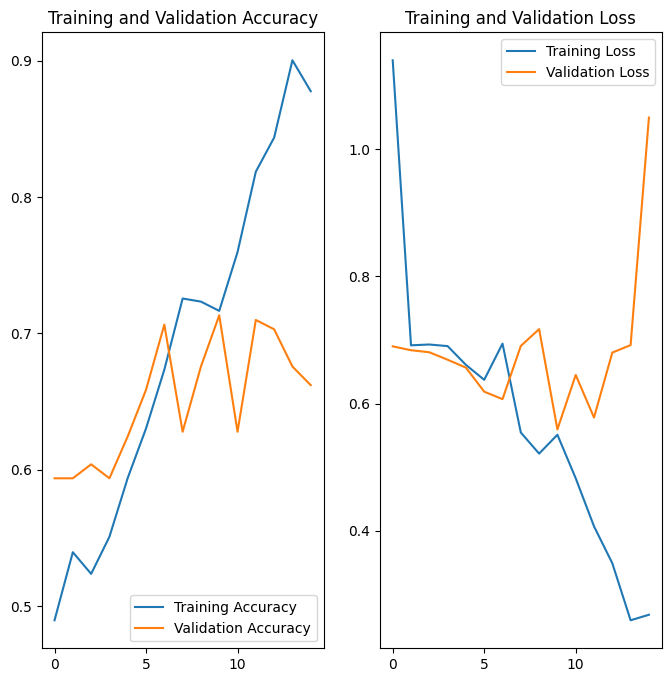

In [22]:
# plot
# Mengambil nilai akurasi dan loss dari objek history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat rentang epochs untuk sumbu x pada grafik
epochs_range = range(epochs)

# Membuat plot untuk akurasi training dan validation
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Membuat plot untuk loss training dan validation
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Menampilkan plot secara keseluruhan
plt.show()



# **Penaganan overfitting dalam model**

In [23]:
# Membuat sekuen augmentasi data dengan Keras Sequential API
data_augmentation = keras.Sequential(
    [
        # Flip horizontal secara acak
        layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),

        # Rotasi acak dengan batas 0.2
        layers.RandomRotation(0.2),

        # Zoom acak dengan batas 0.2
        layers.RandomZoom(0.2),
    ]
)


# **Melakukan test secara visual**

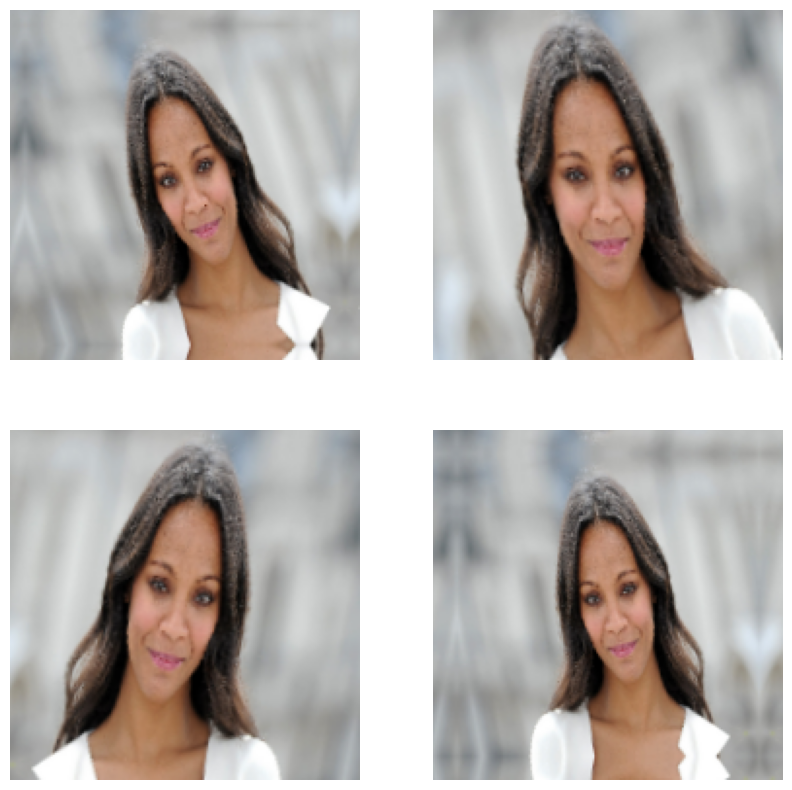

In [24]:
# Membuat gambar dengan ukuran figur 10x10
plt.figure(figsize=(10, 10))

# Mengambil satu batch gambar dari train dataset
for images, _ in train_ds.take(1):
    # Iterasi melalui 4 gambar dalam batch
    for i in range(4):
        # Melakukan augmentasi data pada gambar
        augmented_images = data_augmentation(images)

        # Menampilkan gambar asli dan hasil augmentasi
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))

        # Menonaktifkan sumbu gambar
        plt.axis("off")

# Menampilkan gambar-gambar hasil augmentasi
plt.show()



# **Membangun model**

In [25]:
# Membuat model Sequential
model = Sequential([
    data_augmentation,                       # Layer augmentasi data untuk meningkatkan variasi dataset
    layers.Rescaling(1./255),                # Normalisasi nilai piksel ke dalam rentang 0-1
    layers.Conv2D(32, 3, padding='same', activation='relu'),   # Layer konvolusi dengan 32 filter
    layers.MaxPooling2D(),                   # Layer max pooling untuk mengurangi resolusi spasial
    layers.Conv2D(64, 3, padding='same', activation='relu'),   # Layer konvolusi dengan 64 filter
    layers.MaxPooling2D(),                   # Layer max pooling
    layers.Conv2D(128, 3, padding='same', activation='relu'),  # Layer konvolusi dengan 128 filter
    layers.MaxPooling2D(),                   # Layer max pooling
    layers.Dropout(0.2),                     # Layer dropout untuk mengurangi overfitting
    layers.Flatten(),                        # Mengubah matriks data menjadi vektor
    layers.Dense(256, activation='relu'),    # Layer dense (fully connected) dengan 256 unit
    layers.Dense(1, activation='sigmoid')    # Output layer dengan 1 unit dan fungsi aktivasi sigmoid untuk klasifikasi biner
])

# **Menampilkan Model**

In [26]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                 

# **Melakukan Kompilasi Model dengan optimasi adam**

In [27]:
# Mengompilasi model dengan pengoptimal RMSprop, fungsi loss Binary Crossentropy, dan metrik akurasi
model.compile(
    optimizer='RMSprop',                                           # Pengoptimal yang digunakan
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),    # Fungsi loss yang digunakan
    metrics=['accuracy']                                           # Metrik untuk evaluasi kinerja model
)



# **Pelatihan MOdel**

In [28]:

# Jumlah epochs yang ditentukan untuk pelatihan
epochs = 35

# Melakukan pelatihan model menggunakan metode fit
history = model.fit(
    train_ds,                          # Data pelatihan
    steps_per_epoch=len(train_ds),     # Jumlah langkah per epochs
    validation_data=val_ds,            # Data validasi
    validation_steps=len(val_ds),      # Jumlah langkah validasi per epochs
    epochs=epochs,                     # Jumlah epochs
)



Epoch 1/35
14/14 [==============================] - 4s 88ms/step - loss: 1.3583 - accuracy: 0.5283 - val_loss: 0.6845 - val_accuracy: 0.5973
Epoch 2/35
14/14 [==============================] - 1s 70ms/step - loss: 0.6903 - accuracy: 0.5420 - val_loss: 0.6929 - val_accuracy: 0.4949
Epoch 3/35
14/14 [==============================] - 1s 67ms/step - loss: 0.6923 - accuracy: 0.5351 - val_loss: 0.6788 - val_accuracy: 0.5973
Epoch 4/35
14/14 [==============================] - 1s 64ms/step - loss: 0.6849 - accuracy: 0.5397 - val_loss: 0.6761 - val_accuracy: 0.6007
Epoch 5/35
14/14 [==============================] - 1s 64ms/step - loss: 0.6962 - accuracy: 0.5170 - val_loss: 0.6733 - val_accuracy: 0.6041
Epoch 6/35
14/14 [==============================] - 1s 64ms/step - loss: 0.6807 - accuracy: 0.5692 - val_loss: 0.6546 - val_accuracy: 0.5904
Epoch 7/35
14/14 [==============================] - 1s 64ms/step - loss: 0.6792 - accuracy: 0.5465 - val_loss: 0.6690 - val_accuracy: 0.6519
Epoch 8/35
14

# **Menampilkan data accuracy dan loss**

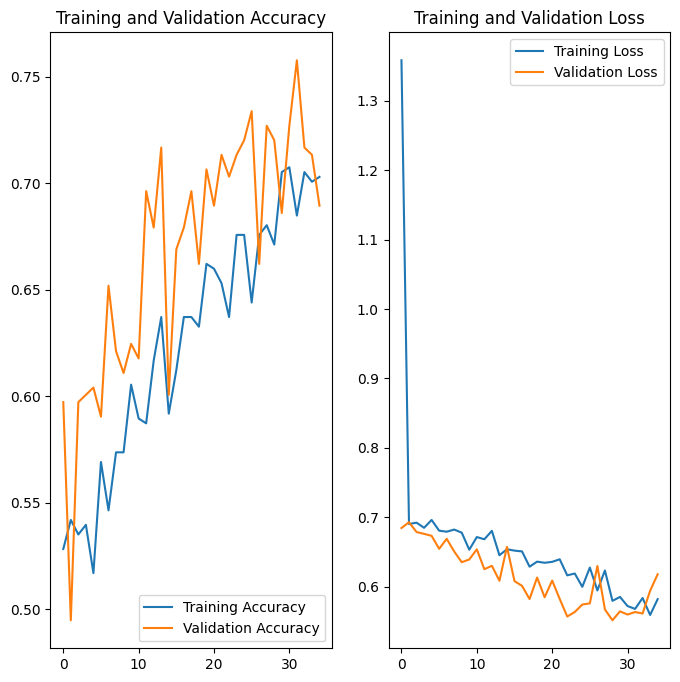

In [29]:
# Mengambil nilai akurasi dan loss dari objek history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Membuat rentang epochs untuk sumbu x pada grafik
epochs_range = range(epochs)

# Membuat plot untuk akurasi training dan validation
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Membuat plot untuk loss training dan validation
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Menampilkan plot secara keseluruhan
plt.show()


# **Melakukan Prediksi**

Saving long-hairstyle-with-side-part_169.jpeg to long-hairstyle-with-side-part_169 (1).jpeg
1/1 [==============================] - 0s 20ms/step
Pada gambar di bawah termasuk kategori Laki - Laki dengan kemiripan 86.30%.


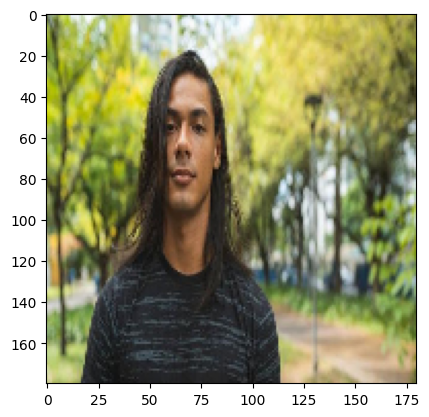

In [32]:
# Mengimpor modul yang diperlukan
from google.colab import files
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score

# Mengunggah file gambar dari Colab
uploaded = files.upload()

# Iterasi melalui setiap file yang diunggah
for fn in uploaded.keys():
    # Menyimpan nama file sementara
    temp_name = fn

    # Memuat gambar dengan menggunakan tensorflow.keras
    img = tf.keras.utils.load_img(
        temp_name, target_size=(img_height, img_width)
    )

    # Menampilkan gambar yang dimuat
    plt.imshow(img)

    # Mengubah gambar menjadi array
    x = image.img_to_array(img)

    # Menambahkan dimensi baru ke array
    x = np.expand_dims(x, axis=0)

    # Membuat array dari gambar yang dimuat
    images = np.vstack([x])

    # Memprediksi kelas gambar menggunakan model
    classes = model.predict(images, batch_size=10)

    # Menentukan label prediksi berdasarkan threshold 0.5
    predicted_label = 0 if classes < 0.5 else 1

    # Menghitung nilai true label berdasarkan threshold 0.5
    true_label = (0.5 - classes) + 0.5 if classes < 0.5 else classes

    # Menampilkan hasil prediksi dan tingkat kemiripan
    print("Pada gambar di bawah termasuk kategori {} dengan kemiripan {:.2f}%."
          .format(class_names[predicted_label], 100 * np.max(true_label)))
